# App Behaviour Analysis
### Aamir Hussain

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
df = pd.read_csv('appdata10.csv')

# EDA

In [3]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [5]:
df['hour'] = df['hour'].str.slice(1,3).astype(int)

In [6]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


# EDA

In [7]:
df2 = df.drop(['user', 'first_open', 'screen_list', 'enrolled', 'enrolled_date'], axis=1)

In [8]:
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


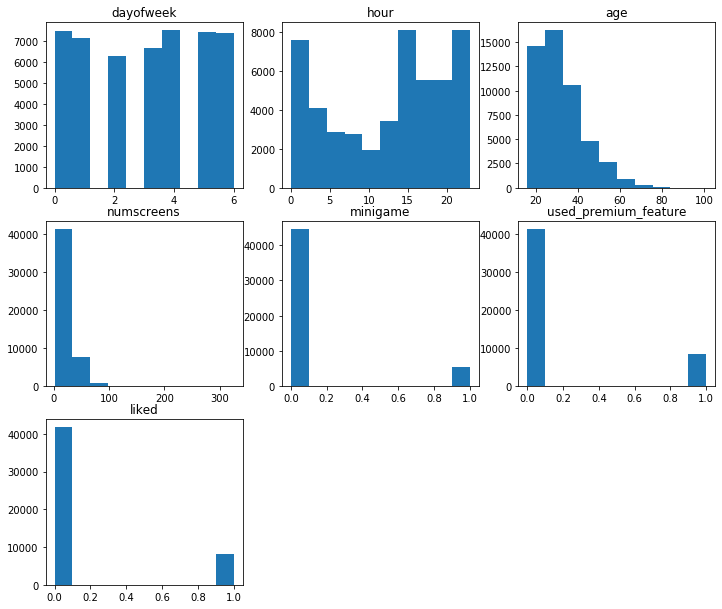

In [9]:
plt.figure(figsize=(12, 14))
for i in range(1, df2.shape[1] + 1):
    plt.subplot(4,3, i)
    plt.title(df2.columns[i - 1])
    plt.hist(df2[df2.columns[i - 1]])

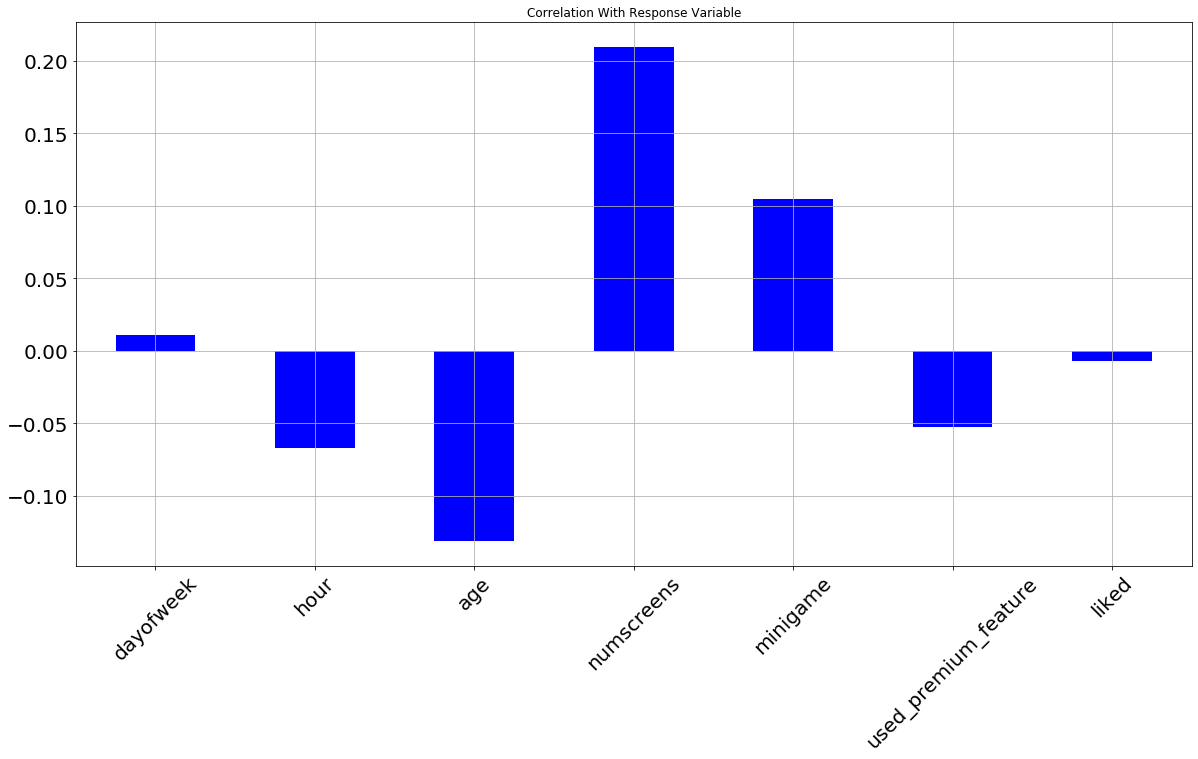

In [10]:
df2.corrwith(df['enrolled']).plot.bar(figsize=(20, 10),title= 'Correlation With Response Variable', 
                                      rot=45, fontsize=20, grid=True, color='blue')

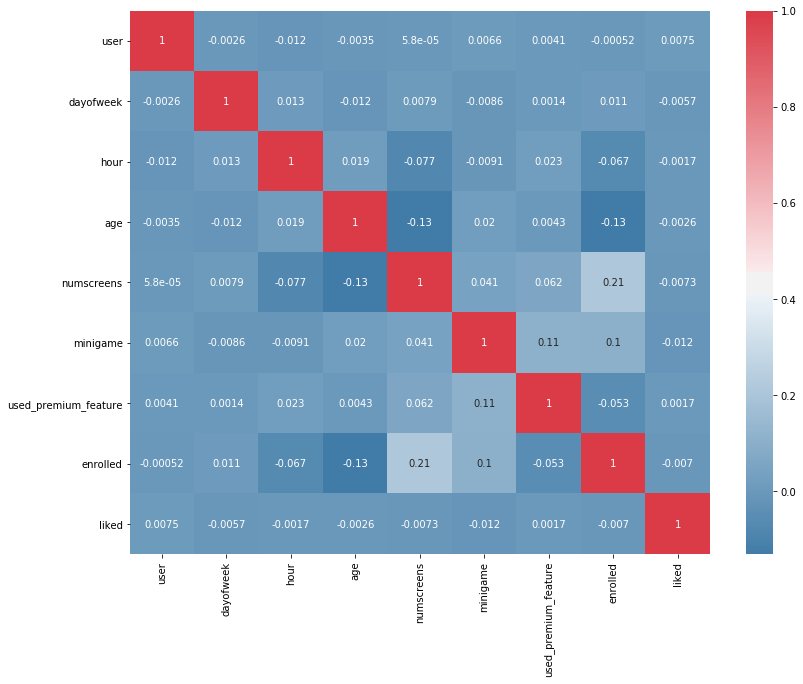

In [11]:
plt.figure(figsize=(13, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, annot=True)

# Feature Engineering

## Dates

In [12]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [13]:
df['first_open'] = [parser.parse(row) for row in df['first_open']]
df['enrolled_date'] = [parser.parse(row) if isinstance(row, str) else row for row in df['enrolled_date']]

In [14]:
df['difference'] = (df['enrolled_date'] - df['first_open']).astype('timedelta64[h]')

In [15]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
difference                     float64
dtype: object

Text(0.5, 1.0, 'Distribution of time since enrolled')

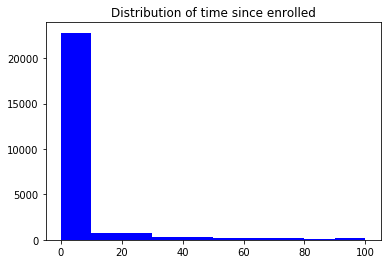

In [16]:
plt.hist(df['difference'].dropna(), range=[0,100], color='blue')
plt.title('Distribution of time since enrolled')

In [17]:
df.loc[df.difference > 48, 'enrolled'] = 0

In [18]:
df.drop(columns=['difference', 'enrolled_date', 'first_open'], inplace=True)

## Screen List Column

In [19]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [20]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [21]:
df['screen_list'] = df.screen_list.astype(str) + ','
for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+',', '')

In [22]:
df['other'] = df.screen_list.str.count(',')
df = df.drop(['screen_list'], axis=1)

In [23]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens, axis=1)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens, axis=1)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(columns=cc_screens, axis=1)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens, axis=1)

## Model Building

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop(['enrolled'], axis=1)
y = df['enrolled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
train_identifier = X_train['user']
test_identifier = X_test['user']
X_train = X_train.drop(['user'], axis=1)
X_test = X_test.drop(['user'], axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [29]:
'''
classifier = SVC()
parameters = {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 
              'gamma': [0.1, 0.01, 0.001, 1]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
'''

'\nclassifier = SVC()\nparameters = {\'C\': [0.25, 0.5, 0.75, 1], \'kernel\': [\'rbf\'], \n              \'gamma\': [0.1, 0.01, 0.001, 1]}\ngrid_search = GridSearchCV(estimator = classifier,\n                           param_grid = parameters,\n                           scoring = \'accuracy\',\n                           n_jobs = -1)\ngrid_search.fit(X_train, y_train)\nbest_accuracy = grid_search.best_score_\nbest_parameters = grid_search.best_params_\nprint("Best Accuracy: {:.2f} %".format(best_accuracy*100))\nprint("Best Parameters:", best_parameters)\n'

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      5072
           1       0.79      0.76      0.78      4928

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

[[4048 1024]
 [1160 3768]]


In [38]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(classifier, X_train, y_train, cv=10)

In [39]:
print(f'Accuracy: {accuracy.mean()*100}')

Accuracy: 78.1875
